<a href="https://colab.research.google.com/github/rohitanil/CausalInferenceProject/blob/main/Causal_Inference_FP_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis
## Using FP-growth algorithm with mlxtend Python library

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
startTime = datetime.now()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load and clean transactions data to be used in the analysis

In [11]:
#read transactions data from csv file
df = pd.read_csv(r'/content/OnlineRetail.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(5, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(6, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(7, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'JUMBO BAG PINK POLKADOT')])

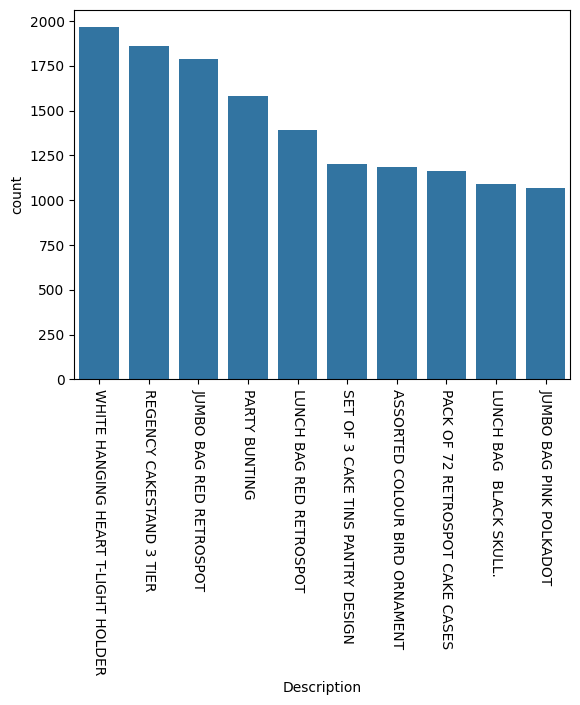

In [12]:
#plot 10 most frequent products in dataset
sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=-90)

In [13]:
#clean the product names
df['Description'] = df['Description'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create basket datafarme from transactions data with each row representing one basket

In [14]:
#create basket dataframe
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded-23343,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#one hot encode the basket
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-32460829f4d3>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded-23343,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Run FP-growth algorithm on frequent item sets (items that frequently appear in the same basket)

In [16]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 300
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is 19145
minimum support value is  1.567 %


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#create frequent items sets with clculated minimum support
frequent_itemsets = fpgrowth(basket_sets, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support
count,436.000000
mean,0.024578
std,0.011133
min,0.015670
25%,0.017485
50%,0.021050
75%,0.027305
max,0.097885


In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
214,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.025855,0.045286,0.023609,0.913131,20.163667,0.022438,10.990313,0.975631
215,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.027422,0.047480,0.023609,0.860952,18.133040,0.022307,6.850317,0.971493
208,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032959,0.045286,0.027422,0.832013,18.372414,0.025930,5.683250,0.977798
94,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.020162,0.024915,0.016506,0.818653,32.857670,0.016003,5.376897,0.989516
74,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG RED RETROSPOT),0.021207,0.090729,0.017028,0.802956,8.850078,0.015104,4.614552,0.906225
26,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.023348,0.090729,0.018595,0.796421,8.778050,0.016477,4.466421,0.907262
157,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER),0.022721,0.047480,0.018073,0.795402,16.752450,0.016994,4.655576,0.962169
212,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.032959,0.047480,0.025855,0.784469,16.522179,0.024290,4.419414,0.971495
156,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.023191,0.045286,0.018073,0.779279,17.207961,0.017022,4.325439,0.964250
153,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.045286,0.047480,0.034265,0.756632,15.935887,0.032115,3.913910,0.981706


### Save results to csv file based on desired association parameters

In [20]:
rules[(rules['lift'] >= 1.4) & (rules['confidence'] >= 0.3)].sort_values(by=['confidence', 'lift'], ascending=False).to_csv(r'Online_Retail_Results_FPGrowth.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print('It took ', datetime.now() - startTime, ' to run')

It took  0:09:07.020341  to run


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
